In [7]:
# In this script we construct fig 5 of the paper which is like figure four but does not focus on the appropriated carbon budget for convergence
# but the emissions at the end of convergence and how far away it is from net zero emissions.

# Import all things necessary
from scenario_class import Scenario
from plots_class import Plots
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.cm as cm
from scenariosweeper_class import ScenarioSweeper
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter

In [8]:


# calculate how much emissions are emitted in a given scenario run and how far above this is the carbon budget by summing the yearly emissions of all countries
# Sweeper 1 
end_year_values = [2040, 2060, 2080, 2100]
income_goal_values = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values = [1150*0.95 - 2*35] #95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values = ["constant_ratio"]
pop_growth_assumption_values = ["semi_log_model"]
tech_evolution_assumption_values = ["plausible"]
tech_hysteresis_assumption_values = ["on"]
steady_state_high_income_assumption_values = ["off"]
population_hysteresis_assumption_values = ["on"]
sigmoid_parameters = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate = -0.05 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper1 = ScenarioSweeper(end_year_values,
                           income_goal_values,
                           carbon_budget_values,
                           gdp_assumption_values,
                           pop_growth_assumption_values,
                           tech_evolution_assumption_values,
                           tech_hysteresis_assumption_values,
                           steady_state_high_income_assumption_values,
                           sigmoid_parameters,
                           final_improvement_rate,
                           population_hysteresis_assumption_values)


# Sweeper 2
end_year_values2 = [2040, 2060, 2080, 2100]
income_goal_values2 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values2 = [1150*0.95 - 2*35] #95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values2 = ["constant_ratio"]
pop_growth_assumption_values2 = ["semi_log_model"]
tech_evolution_assumption_values2 = ["plausible"]
tech_hysteresis_assumption_values2 = ["off"] # this is off because there is no hysteresis in a scenario with no degrowing country
steady_state_high_income_assumption_values2 = ["on"]
population_hysteresis_assumption_values2 = ["off"] # this is off because there is no hysteresis in a scenario with no degrowing country
sweeper2 = ScenarioSweeper(end_year_values2,
                            income_goal_values2,
                            carbon_budget_values2,
                            gdp_assumption_values2,
                            pop_growth_assumption_values2,
                            tech_evolution_assumption_values2,
                            tech_hysteresis_assumption_values2,
                            steady_state_high_income_assumption_values2,
                            sigmoid_parameters,
                            final_improvement_rate,
                            population_hysteresis_assumption_values2)

# Sweeper 3
end_year_values3 = [2040, 2060, 2080, 2100]
income_goal_values3 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values3 = [1150*0.95 - 2*35] #95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values3 = ["constant_ratio"]
pop_growth_assumption_values3 = ["semi_log_model"]
tech_evolution_assumption_values3 = ["plausible"]
tech_hysteresis_assumption_values3 = ["off"] # this is off because there is no hysteresis in a scenario with no degrowing country
steady_state_high_income_assumption_values3 = ["on_with_growth"]
population_hysteresis_assumption_values3 = ["off"] # this is off because there is no hysteresis in a scenario with no degrowing country
sweeper3 = ScenarioSweeper(end_year_values3,
                            income_goal_values3,
                            carbon_budget_values3,
                            gdp_assumption_values3,
                            pop_growth_assumption_values3,
                            tech_evolution_assumption_values3,
                            tech_hysteresis_assumption_values3,
                            steady_state_high_income_assumption_values3,
                            sigmoid_parameters,
                            final_improvement_rate,
                            population_hysteresis_assumption_values3)

output_sweeper1 = sweeper1.run_scenarios() 
output_sweeper2 = sweeper2.run_scenarios()
output_sweeper3 = sweeper3.run_scenarios()

this is the coords_0 [array([[2082.45715664, 5000.        ],
       [2095.22689595, 8139.59833722]])]
this is the coords_0 [array([[2096.55872003, 5000.        ],
       [2100.        , 7761.07880443]])]
this is the coords_0 []


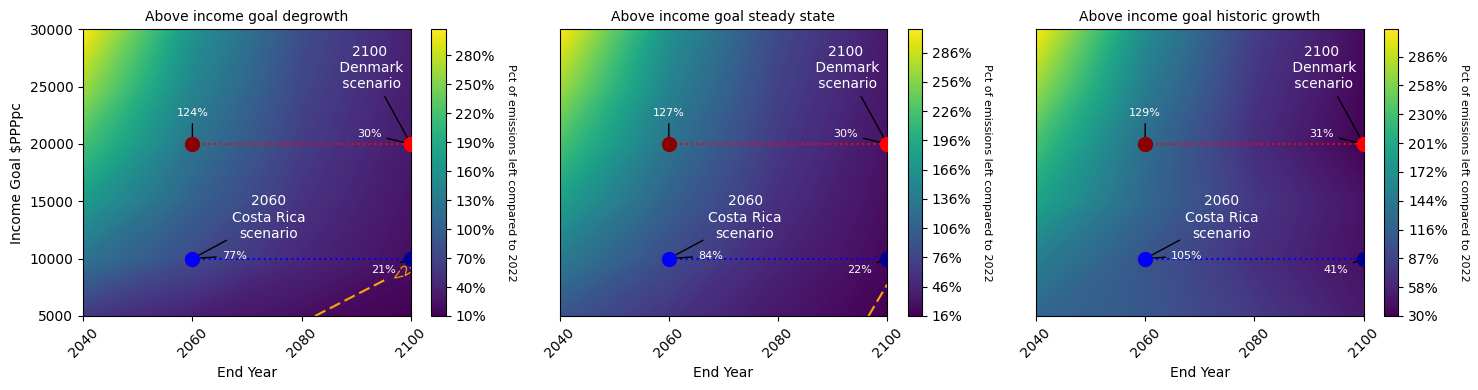

In [9]:
### first we transform the output of the sweeper to an input for the plots function by making it a percentage ratio
# of the initial emissions in 2022. This is done to make the plot more readable and to show the distance to net zero emission

# output[0] is the emissions and output[1] is the gdp growth rate globally
input1 = output_sweeper1[3] # output now will be transformed to an input for the plots function
input2 = output_sweeper2[3] # output now will be transformed to an input for the plots function
input3 = output_sweeper3[3] # output now will be transformed to an input for the plots function

def divide_dict_values(data_dict, divisor):
    return {key: value / divisor for key, value in data_dict.items()}

# Assuming your divisor is a constant number, for example 10
divisor = 32 ## this is the emissions in gigatonnes

# Transform each dictionary
input1 = divide_dict_values(output_sweeper1[3], divisor)
input2 = divide_dict_values(output_sweeper2[3], divisor)
input3 = divide_dict_values(output_sweeper3[3], divisor)


# Create a figure
fig = plt.figure(figsize=(15, 4))

# Define a GridSpec for a 2x2 grid
# Adjust the GridSpec to allocate more space for the subplot with the colorbar
# Add height_ratios for the rows. Adjust the values as needed.
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[2])  # Adjust the 2 as needed

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])  # First row, first column
ax2 = fig.add_subplot(gs[0, 1])  # First row, second column
ax3 = fig.add_subplot(gs[0, 2])  # First row, third column (with extra width)

# division by 32 to get the emissions in GtCO2 ratio with respect to the beginning
# Create a new figure with four axes
sweeper1.plot_final_emissions_trade_off(input1, ["end_year", "income_goal"], ax = ax1, annotations_plot = False, colorscaleon = True)
sweeper2.plot_final_emissions_trade_off(input2, ["end_year", "income_goal"], ax = ax2, annotations_plot = False, colorscaleon = True)   
sweeper3.plot_final_emissions_trade_off(input3, ["end_year", "income_goal"], ax = ax3, annotations_plot = False, colorscaleon = True)

# After plotting:
# For ax2 and ax3, remove y-axis labels, tick labels, and tick markers
ax2.set_ylabel('')
ax2.set_yticks([])
ax3.set_ylabel('')
ax3.set_yticks([])

# delete y axis ticklabels
ax2.set_yticklabels([])
ax3.set_yticklabels([])

# Setting titles for each subplot
ax3.set_title("Above income goal historic growth", fontsize=10)
ax2.set_title("Above income goal steady state", fontsize=10)
ax1.set_title("Above income goal degrowth", fontsize=10)  # 'pad' adjusts the distance between the title and the plot

# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax1.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax2.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax3.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
# annotate the costa rica scenario dots
ax1.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax2.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax3.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')

plt.tight_layout()
# save high resolution as fig4
plt.savefig('fig5_row1.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:


# Sweeper 4
end_year_values4 = [2040, 2060, 2080, 2100]
income_goal_values4 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values4 = [1150*0.95 - 2*35]#95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values4 = ["constant_ratio"]
pop_growth_assumption_values4 = ["semi_log_model"]
tech_evolution_assumption_values4 = ["plausible"]
tech_hysteresis_assumption_values4 = ["on"]
steady_state_high_income_assumption_values4 = ["off"]
population_hysteresis_assumption_values4 = ["on"]
sigmoid_parameters4 = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate4 = -0.02 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper4 = ScenarioSweeper(end_year_values4,
                            income_goal_values4,
                            carbon_budget_values4,
                            gdp_assumption_values4,
                            pop_growth_assumption_values4,
                            tech_evolution_assumption_values4,
                            tech_hysteresis_assumption_values4,
                            steady_state_high_income_assumption_values4,
                            sigmoid_parameters4, # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
                            final_improvement_rate4,
                            population_hysteresis_assumption_values4)

# Sweeper 5
end_year_values5 = [2040, 2060, 2080, 2100]
income_goal_values5 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values5 = [1150*0.95 - 2*35]
hysteresis_tech_progress_values5 = [0.05]
gdp_assumption_values5 = ["constant_ratio"]
pop_growth_assumption_values5 = ["semi_log_model"]
tech_evolution_assumption_values5 = ["plausible"]
tech_hysteresis_assumption_values5 = ["on"]
steady_state_high_income_assumption_values5 = ["off"]
population_hysteresis_assumption_values5 = ["on"]
sigmoid_parameters5 = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate5 = -0.06 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper5 = ScenarioSweeper(end_year_values5,
                           income_goal_values5,
                           carbon_budget_values5,
                           gdp_assumption_values5,
                           pop_growth_assumption_values5,
                           tech_evolution_assumption_values5,
                           tech_hysteresis_assumption_values5,
                           steady_state_high_income_assumption_values5,
                           sigmoid_parameters5,
                           final_improvement_rate5,
                           population_hysteresis_assumption_values5)


# Sweeper 6
end_year_values6 = [2040, 2060, 2080, 2100]
income_goal_values6 = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values6 = [1150*0.95 - 2*35]
gdp_assumption_values6 = ["constant_ratio"]
pop_growth_assumption_values6 = ["semi_log_model"]
tech_evolution_assumption_values6 = ["plausible"]
tech_hysteresis_assumption_values6 = ["on"]
steady_state_high_income_assumption_values6 = ["off"]
population_hysteresis_assumption_values6 = ["on"]
sigmoid_parameters6 = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate6 = -0.18 # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
sweeper6 = ScenarioSweeper(end_year_values6,
                           income_goal_values6,
                           carbon_budget_values6,
                           gdp_assumption_values6,
                           pop_growth_assumption_values6,
                           tech_evolution_assumption_values6,
                           tech_hysteresis_assumption_values6,
                           steady_state_high_income_assumption_values6,
                           sigmoid_parameters6,
                           final_improvement_rate6,
                           population_hysteresis_assumption_values6)

output_sweeper4 = sweeper4.run_scenarios()
output_sweeper5 = sweeper5.run_scenarios()
output_sweeper6 = sweeper6.run_scenarios()



this is the coords_0 []
this is the coords_0 [array([[ 2074.39162262,  5000.        ],
       [ 2080.        ,  6135.59855928],
       [ 2094.10278075, 10000.        ],
       [ 2096.29363708, 12955.02520772],
       [ 2098.68454552, 17095.68480263],
       [ 2099.89684113, 20000.        ],
       [ 2100.        , 20338.444039  ]])]
this is the coords_0 [array([[ 2055.44983405,  5000.        ],
       [ 2060.        ,  6030.302802  ],
       [ 2073.25693794, 10000.        ],
       [ 2075.00496581, 12929.34341289],
       [ 2076.93698554, 17104.82001364],
       [ 2077.89487864, 20000.        ],
       [ 2078.93987592, 25000.        ],
       [ 2079.6065092 , 30000.        ]])]


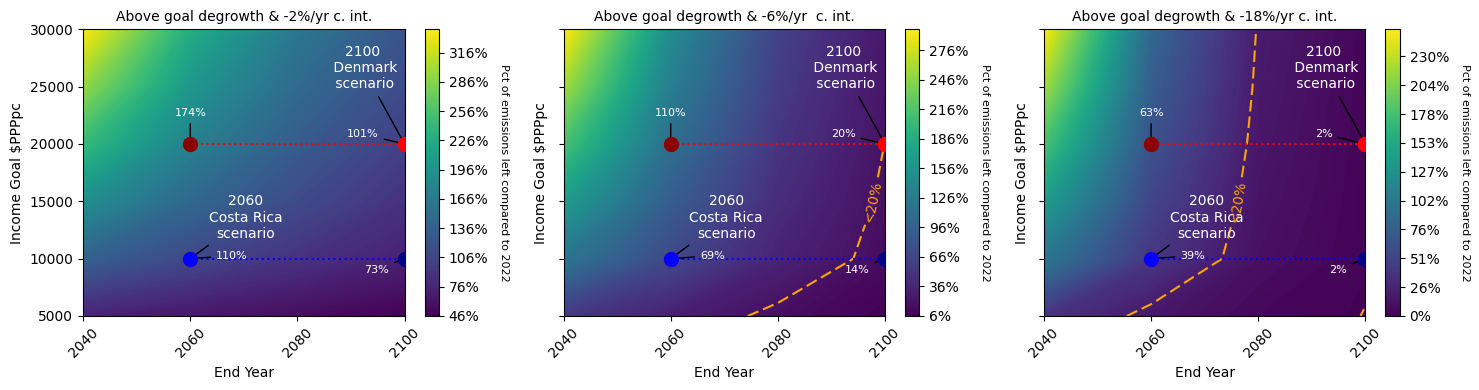

In [14]:

# Create a figure
fig = plt.figure(figsize=(15, 4))

# Define a GridSpec for a 2x2 grid
# Adjust the GridSpec to allocate more space for the subplot with the colorbar
# Add height_ratios for the rows. Adjust the values as needed.
gs = gridspec.GridSpec(1, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[2])  # Adjust the 2 as needed
# Create subplots
ax4 = fig.add_subplot(gs[0, 0])  # First row, first column
ax5 = fig.add_subplot(gs[0, 1])  # First row, second column
ax6 = fig.add_subplot(gs[0, 2])  # First row, third column (with extra width)

# output[0] is the emissions and output[1] is the gdp growth rate globally
input4 = output_sweeper4[3] # output now will be transformed to an input for the plots function
input5 = output_sweeper5[3] # output now will be transformed to an input for the plots function
input6 = output_sweeper6[3] # output now will be transformed to an input for the plots function


# Transform each dictionary
input4 = divide_dict_values(output_sweeper4[3], divisor)
input5 = divide_dict_values(output_sweeper5[3], divisor)
input6 = divide_dict_values(output_sweeper6[3], divisor)


# Create a new figure with four axes
sweeper4.plot_final_emissions_trade_off(input4, ["end_year", "income_goal"], ax = ax4, annotations_plot = False, colorscaleon = True)
sweeper5.plot_final_emissions_trade_off(input5, ["end_year", "income_goal"], ax = ax5, annotations_plot = False, colorscaleon = True)   
sweeper6.plot_final_emissions_trade_off(input6, ["end_year", "income_goal"], ax = ax6, annotations_plot = False, colorscaleon = True)

ax4.set_title("Above goal degrowth & -2%/yr c. int.", fontsize = 10)
ax5.set_title("Above goal degrowth & -6%/yr  c. int.", fontsize = 10)
ax6.set_title("Above goal degrowth & -18%/yr c. int.", fontsize = 10)

ax5.set_yticklabels([])
ax6.set_yticklabels([])

# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax4.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax5.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax6.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
# annotate the costa rica scenario dots
ax4.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax5.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax6.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(40,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')

plt.tight_layout()
# save high resolution as supp_figx
plt.savefig('fig5_row2.png', dpi=300, bbox_inches='tight')
plt.show()

this is the coords_0 [array([[2082.45715664, 5000.        ],
       [2095.0947514 , 8107.10896467]])]
this is the coords_0 [array([[2096.55872003, 5000.        ],
       [2100.        , 7761.07880443]])]
this is the coords_0 []
this is the coords_0 []
this is the coords_0 [array([[ 2074.39162262,  5000.        ],
       [ 2080.        ,  6135.59855928],
       [ 2094.10278075, 10000.        ],
       [ 2096.15414647, 12766.88038695],
       [ 2098.76967628, 17299.63385437],
       [ 2099.89684113, 20000.        ],
       [ 2100.        , 20338.444039  ]])]
this is the coords_0 [array([[ 2056.37797064,  5000.        ],
       [ 2060.        ,  5786.95871253],
       [ 2074.33457542, 10000.        ],
       [ 2077.17646827, 15000.        ],
       [ 2078.01678389, 17686.09503309],
       [ 2079.19736567, 22325.17007197],
       [ 2079.72274642, 25000.        ],
       [ 2080.        , 27068.29807771],
       [ 2081.32947099, 30000.        ]])]


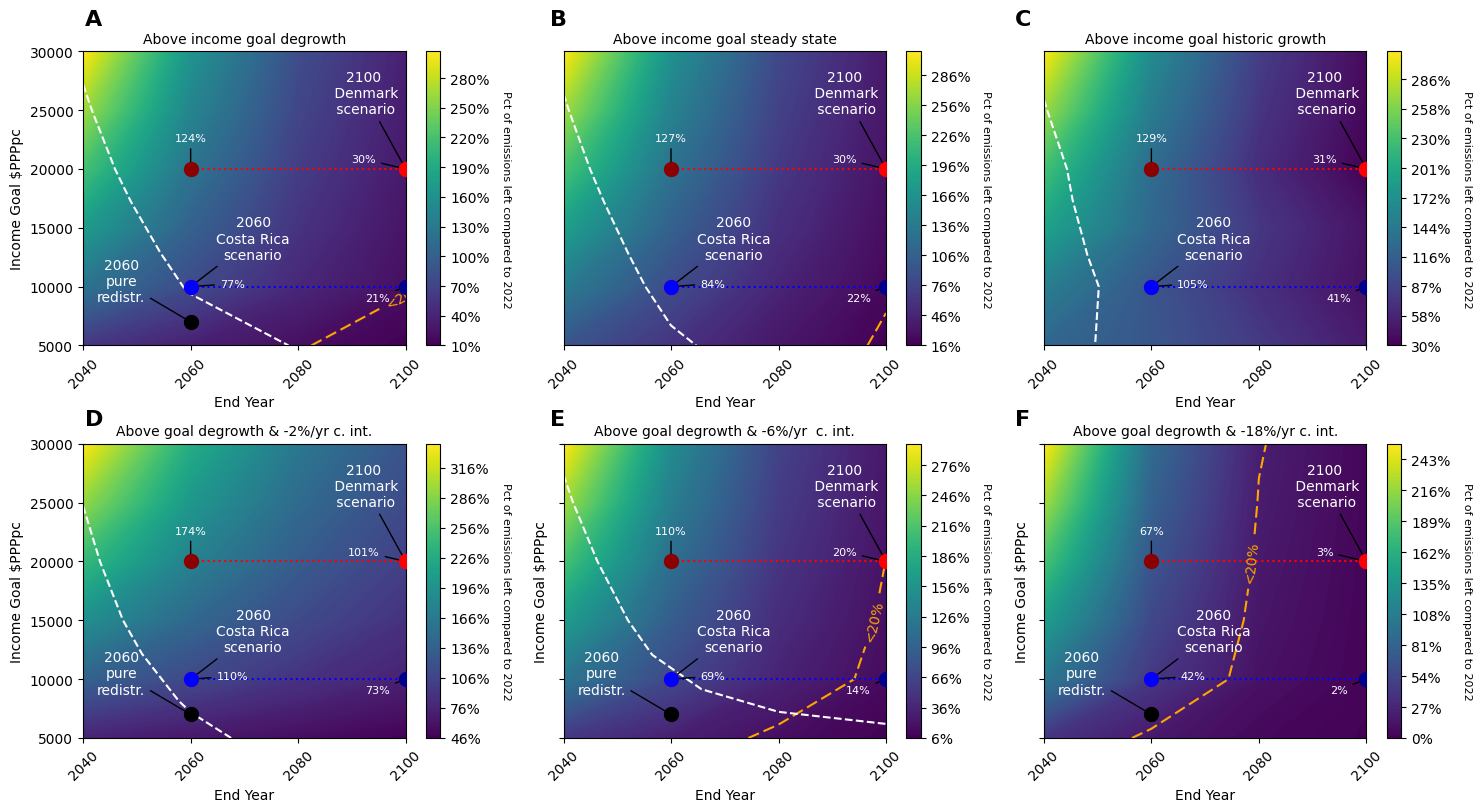

In [12]:
# make new figure with 6 axes and panels which brings together the two figures above for the main figure and use grid spec
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Create a new figure
fig = plt.figure(figsize=(15, 8))

# Define a GridSpec for a 2x3 grid
gs = gridspec.GridSpec(2, 3, figure=fig)

# Add the subplots from the previous figures to the new figure
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])

sweeper1.plot_final_emissions_trade_off(input1, ["end_year", "income_goal"], ax=ax1, annotations_plot=False, colorscaleon=True)
sweeper2.plot_final_emissions_trade_off(input2, ["end_year", "income_goal"], ax=ax2, annotations_plot=False, colorscaleon=True)
sweeper3.plot_final_emissions_trade_off(input3, ["end_year", "income_goal"], ax=ax3,  annotations_plot=False, colorscaleon=True)
sweeper4.plot_final_emissions_trade_off(input4, ["end_year", "income_goal"], ax = ax4, annotations_plot = False, colorscaleon = True)
sweeper5.plot_final_emissions_trade_off(input5, ["end_year", "income_goal"], ax = ax5, annotations_plot = False, colorscaleon = True)   
sweeper6.plot_final_emissions_trade_off(input6, ["end_year", "income_goal"], ax = ax6, annotations_plot = False, colorscaleon = True)

########################################
############ AX ANNOTATIONS ############
########################################

# After plotting:
# For ax2 and ax3, remove y-axis labels, tick labels, and tick markers
ax2.set_ylabel('')
ax2.set_yticks([])
ax3.set_ylabel('')
ax3.set_yticks([])
# delete y axis ticklabels
ax2.set_yticklabels([])
ax3.set_yticklabels([])
# Setting titles for each subplot
ax3.set_title("Above income goal historic growth", fontsize=10)
ax2.set_title("Above income goal steady state", fontsize=10)
ax1.set_title("Above income goal degrowth", fontsize=10)  # 'pad' adjusts the distance between the title and the plot
# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax1.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax2.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax3.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax1.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(45,20), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax2.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(45,20), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax3.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(45,20), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')


# annotate the costa rica scenario dots
#ax1.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax2.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax3.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')

# annotate ax1 with the pure redistribution scenario
ax1.scatter(2060, 7000, s=100, c='black', marker='o', zorder = 5, label='Redistr. 2060')
ax1.annotate("2060\npure\nredistr.", (2060, 7000), textcoords="offset points", xytext=(-50,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')


ax4.set_title("Above goal degrowth & -2%/yr c. int.", fontsize = 10)
ax5.set_title("Above goal degrowth & -6%/yr  c. int.", fontsize = 10)
ax6.set_title("Above goal degrowth & -18%/yr c. int.", fontsize = 10)
ax5.set_yticklabels([])
ax6.set_yticklabels([])
# annotate the costa rica scenario as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax4.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax5.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax6.scatter(2060, 10000, s=100, c='blue', marker='o', zorder = 5, label='Costa Rica')
ax4.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(45,20), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax5.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(45,20), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax6.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(45,20), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')


# annotate the costa rica scenario dots
#ax4.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax5.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
#ax6.annotate("2060\nCosta Rica\nscenario", (2060, 10000), textcoords="offset points", xytext=(55,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
# for all axes set colorbar ticks to min, 1, 1.5, 2, max


# annotate the pure redistribution (so no aggregate growth) as a scatter dot on all three axis for clarity at x axis = 2060 and y axis = 10000
ax4.scatter(2060, 7000, s=100, c='black', marker='o', zorder = 5, label='Redistr. 2060')
ax5.scatter(2060, 7000, s=100, c='black', marker='o', zorder = 5, label='Redistr. 2060')
ax6.scatter(2060, 7000, s=100, c='black', marker='o', zorder = 5, label='Redistr. 2060')
# annotate the costa rica scenario dots
ax4.annotate("2060\npure\nredistr.", (2060, 7000), textcoords="offset points", xytext=(-50,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax5.annotate("2060\npure\nredistr.", (2060, 7000), textcoords="offset points", xytext=(-50,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')
ax6.annotate("2060\npure\nredistr.", (2060, 7000), textcoords="offset points", xytext=(-50,15), ha='center', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0"), color='white')

# Panel labels
labels = ["A", "B", "C", "D", "E", "F"]
# Coordinates for the labels to be placed, relative to the figure size
# These values might need adjustment depending on the exact figure layout
label_coords = [(0.06, 1.01), (0.37, 1.01), (0.68, 1.01), 
                (0.06, 0.51), (0.37, 0.51), (0.68, 0.51)]

for label, (x, y) in zip(labels, label_coords):
    fig.text(x, y, label, fontsize=16, fontweight='bold', va='top', ha='left')

#### ANnotate axis specific 2 degree budget contour lines for clarity of feasible regions

coords_0 = np.array([[ 2040.        , 27164.48389838],
       [ 2041.61956293, 25000.        ],
       [ 2045.92006516, 20000.        ],
       [ 2048.89899781, 17212.54119917],
       [ 2054.33371882, 12909.49532082],
       [ 2058.60671855, 10000.        ],
       [ 2060.        ,  9371.10534292],
       [ 2078.21800249,  5000.        ]])

coords_1 = np.array([[ 2040.        , 26373.56130131],
       [ 2040.97689803, 25000.        ],
       [ 2044.92738335, 20000.        ],
       [ 2047.47495683, 17250.63960215],
       [ 2052.05366252, 12806.89358399],
       [ 2055.24470098, 10000.        ],
       [ 2060.        ,  6698.87145499],
       [ 2064.68984152,  5000.        ]])

coords_2 = np.array([[ 2040.        , 25896.59875949],
       [ 2040.60495657, 25000.        ],
       [ 2044.2973881 , 20000.        ],
       [ 2045.34249264, 17354.24497018],
       [ 2048.07383855, 12716.02098562],
       [ 2050.21598455, 10000.        ],
       [ 2049.52430825,  5000.        ]])

coords_3 = np.array([[ 2040.        , 24706.65039534],
       [ 2043.13364521, 20000.        ],
       [ 2047.41561743, 15000.        ],
       [ 2050.93045905, 12162.83242175],
       [ 2057.74314887,  8177.45196527],
       [ 2060.        ,  7182.29866993],
       [ 2067.53088008,  5000.        ]])

coords_4 = np.array([[ 2040.        , 27353.42971094],
       [ 2041.78459948, 25000.        ],
       [ 2046.30992961, 20000.        ],
       [ 2051.98709651, 15000.        ],
       [ 2056.50232205, 12067.30513501],
       [ 2065.66497717,  9146.28260813],
       [ 2080.        ,  7223.07886166],
       [ 2100.        ,  6196.54468656]])

coords_5 = np.array([[ 2042.42287797, 30000.        ],
       [ 2048.39385044, 25000.        ],
       [ 2055.76312615, 20000.        ],
       [ 2056.61220458, 19493.17407163],
       [ 2066.33139723, 17056.21354214],
       [ 2080.        , 16160.84451361],
       [ 2100.        , 18909.40795533]])

ax1.plot(coords_0[:, 0], coords_0[:, 1], color = "white", linestyle = '--', label='2°C')  # 'w--' for white dashed line
ax2.plot(coords_1[:, 0], coords_1[:, 1], color = "white", linestyle = '--', label='2°C')  # 'w--' for white dashed line
ax3.plot(coords_2[:, 0], coords_2[:, 1], color = "white", linestyle = '--', label='2°C')  # 'w--' for white dashed line
ax4.plot(coords_3[:, 0], coords_3[:, 1], color = "white", linestyle = '--', label='2°C')  # 'w--' for white dashed line
ax5.plot(coords_4[:, 0], coords_4[:, 1], color = "white", linestyle = '--', label='2°C')  # 'w--' for white dashed line
#ax6.plot(coords_5[:, 0], coords_5[:, 1], color = "white", linestyle = '--', label='2°C')  # 'w--' for white dashed line


       
# Adjust the layout of the subplots
fig.tight_layout()

# save high resolution as supp_figx
plt.savefig('fig5.png', dpi=300, bbox_inches='tight')
plt.show()
